In [8]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 
import torch.optim as optim

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
reload(pipeline)
reload(consts)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [14]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = pipeline.make_student_model()

    mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
    
    loss_fn = antidistil.altidistill_loss
    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_antidistil_learning_rate)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.85)

    lambdas = [1, 0, 1, 0]
    
    for epoch in range(consts.student_5_antidistil_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.antidistil_loop(teacher, model, lambdas, mask, train_dataloader, 
                                 loss_fn, optimizer, scheduler, noise_dist='uniform', noise_eps=1e-1)

    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)    

    mask = torch.ones(10).to(consts.device)

    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model, history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/no_antidistill_{i}.pt')

Model 10
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Train Loss: 1.7287098625872999
Train Acc: 0.7156666666666667
Epoch 2
-------------------------------


Train Loss: 1.4876464478513027
Train Acc: 0.7452
Epoch 3
-------------------------------


Train Loss: 1.4277677333101313
Train Acc: 0.7530333333333333
Epoch 4
-------------------------------


Train Loss: 1.3836384293880868
Train Acc: 0.7577
Epoch 5
-------------------------------


Train Loss: 1.3568551116801322
Train Acc: 0.7606
Epoch 6
-------------------------------


Train Loss: 1.32813413929432
Train Acc: 0.7631
Epoch 7
-------------------------------


Train Loss: 1.3009867741706524
Train Acc: 0.7663333333333333
Epoch 8
-------------------------------


Train Loss: 1.2819039902788527
Train Acc: 0.7677
Epoch 9
-------------------------------


Train Loss: 1.2702526901630644
Train Acc: 0.7688333333333334
Epoch 10
-------------------------------


Train Loss: 1.2553702164203562
Train Acc: 0.7708333333333334
Epoch 11
-------------------------------


Train Loss: 1.2435281157493592
Train Acc: 0.772
Epoch 12
-------------------------------


Train Loss: 1.2290680205568354
Train Acc: 0.7726333333333333
Epoch 13
-------------------------------


Train Loss: 1.2164459208224683
Train Acc: 0.7737333333333334
Epoch 14
-------------------------------


Train Loss: 1.2059683231597251
Train Acc: 0.7754333333333333
Epoch 15
-------------------------------


Train Loss: 1.1948063312692845
Train Acc: 0.7767
Epoch 1
-------------------------------


Validation accuracy: 55.7%, Validation loss: 1.359808 

Epoch 2
-------------------------------


Validation accuracy: 68.4%, Validation loss: 0.951418 

Epoch 3
-------------------------------


Validation accuracy: 74.3%, Validation loss: 0.767829 

Epoch 4
-------------------------------


Validation accuracy: 76.8%, Validation loss: 0.682608 

Epoch 5
-------------------------------


Validation accuracy: 77.6%, Validation loss: 0.649188 

Epoch 6
-------------------------------


Validation accuracy: 78.3%, Validation loss: 0.629851 

Epoch 7
-------------------------------


Validation accuracy: 78.6%, Validation loss: 0.616932 

Epoch 8
-------------------------------


Validation accuracy: 78.9%, Validation loss: 0.606660 

Epoch 9
-------------------------------


Validation accuracy: 79.2%, Validation loss: 0.598042 

Epoch 10
-------------------------------


Validation accuracy: 79.4%, Validation loss: 0.590513 

Epoch 11
-------------------------------


Validation accuracy: 79.6%, Validation loss: 0.583754 

Epoch 12
-------------------------------


Validation accuracy: 79.8%, Validation loss: 0.578423 

Epoch 13
-------------------------------


Validation accuracy: 79.9%, Validation loss: 0.573892 

Epoch 14
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.569649 

Epoch 15
-------------------------------


Validation accuracy: 80.2%, Validation loss: 0.566065 

Epoch 16
-------------------------------


Validation accuracy: 80.3%, Validation loss: 0.563578 

Epoch 17
-------------------------------


Validation accuracy: 80.4%, Validation loss: 0.561042 

Epoch 18
-------------------------------


Validation accuracy: 80.5%, Validation loss: 0.558767 

Epoch 19
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.556401 

Epoch 20
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.554268 

Epoch 21
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.552395 

Epoch 22
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.550884 

Epoch 23
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.549438 

Epoch 24
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.548048 

Epoch 25
-------------------------------


Validation accuracy: 80.7%, Validation loss: 0.546995 

Epoch 26
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.545973 

Epoch 27
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.544891 

Epoch 28
-------------------------------


Validation accuracy: 80.9%, Validation loss: 0.544006 

Epoch 29
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.543011 

Epoch 30
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.542135 



FSGM Accuracy [0.81, 0.792, 0.7728, 0.748, 0.7201, 0.6906, 0.6591, 0.6269, 0.5921, 0.5577]


Noise Accuracy [0.81, 0.8069, 0.7989, 0.7855, 0.7464, 0.7173, 0.7029, 0.6698, 0.6456, 0.6031]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


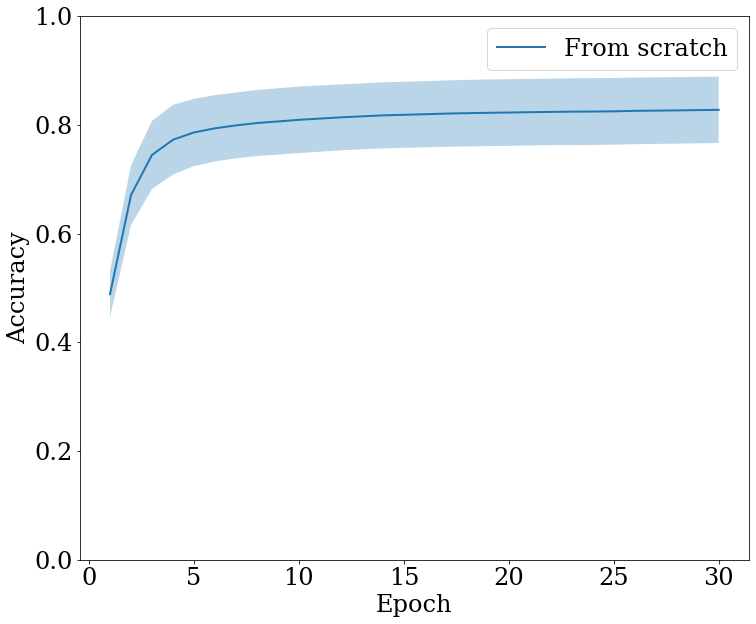

In [15]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs + 1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

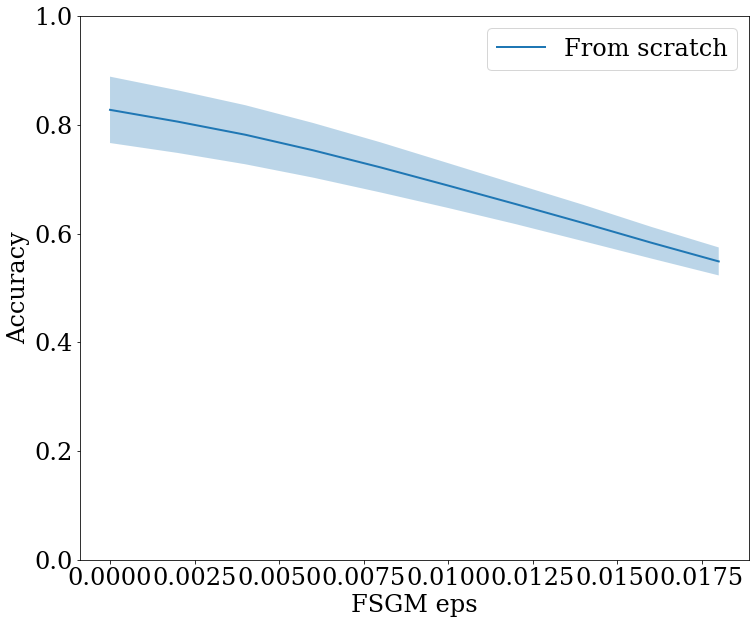

In [16]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

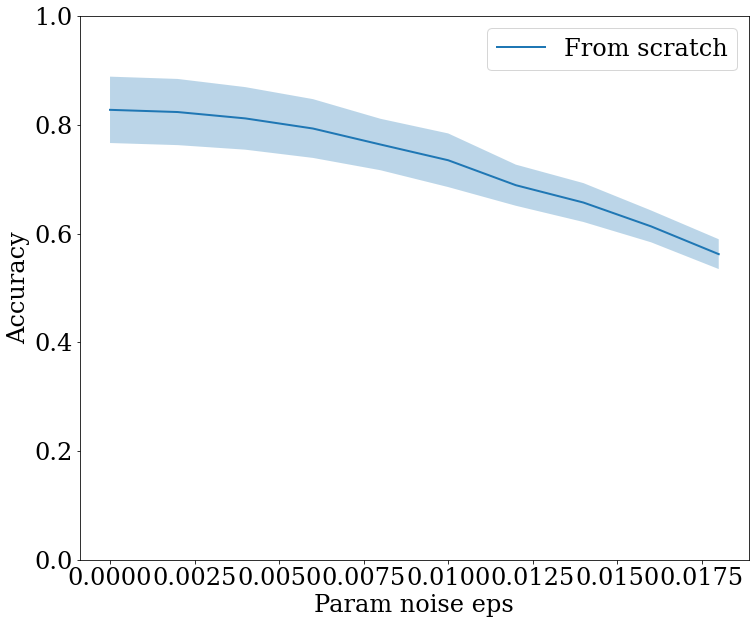

In [17]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [18]:
with open(pipeline.get_path()+'/history_no_antidistil.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
